<a href="https://colab.research.google.com/github/SprigganCS/IA-atividade-III/blob/main/classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

André Neves Medeiros

Arthur Barros Klimas

Arthur Rodrigues Proença

Tiago Costa Soares

Base de dados: "Fetal Health Classification", disponível em: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

Classificação da saúde de fetos: Normal, Suspect, Pathological

Importando bibliotecas e a base de dados

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


Importando a base de dados do github, separando as features e os conjuntos de treino e teste

In [56]:
fetos = pd.read_csv("https://raw.githubusercontent.com/SprigganCS/mushroomsdb/main/fetal_health.csv") # Importa o csv
feature_names = ['accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'] # Seleciona as features
fetos.dropna(subset=feature_names, inplace=True) # Trata valores nulos

X_fetos=fetos[feature_names]  # O eixo X terá os valores das features selecionadas em features_names (valores usados para prever a saúde do feto)
y_fetos=fetos['fetal_health'] # O eixo Y conterá os valores reais, a saúde do feto (medida de 1 a 3)

X_fetos_train, X_fetos_test, y_fetos_train, y_fetos_test = train_test_split(X_fetos, y_fetos, test_size=0.25, random_state=123) # Faz a separação dos dados de treino e teste

Resumidamente, os valores das colunas selecionadas em feature_names vão servir para calcular o valor da coluna de resultado "fetal_health"

In [57]:
print('Tamanho de X_fetos_train: ', X_fetos_train.shape) # Quantas colunas para X do TREINO
print('Tamanho de X_fetos_test: ', X_fetos_test.shape)   # Quantas colunas para X do TESTE
print('Tamanho de y_fetos_train: ', y_fetos_train.shape) # Quantas colunas para Y do TREINO
print('Tamanho de y_fetos_test: ', y_fetos_test.shape)   # Quantas colunas para Y do TESTE

# (qtd de dados, colunas)

Tamanho de X_fetos_train:  (1594, 20)
Tamanho de X_fetos_test:  (532, 20)
Tamanho de y_fetos_train:  (1594,)
Tamanho de y_fetos_test:  (532,)


In [58]:
from sklearn.tree import DecisionTreeClassifier                                   # Importa o classificador da árvore de decisão
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=20, random_state=123) # Salva o classificador com características específicas

clf.fit(X_fetos_train, y_fetos_train) # Treina o classificador

DecisionTreeClassifier(max_depth=2, min_samples_split=20, random_state=123)

**Acurácia**

Para a acurácia do classificador se retorna a porcentagem do acerto, quanto maior melhor.

In [59]:
from sklearn.model_selection import cross_val_score

acuracia_clf_train = 100 * cross_val_score(clf, X_fetos_train, y_fetos_train).mean() # Calcula a acurácia para o treino de classificação
print("Acurácia para o treino:",acuracia_clf_train,"\n")                            #mostra a acurácia para o treino

acuracia_clf_test = 100 * cross_val_score(clf, X_fetos_test, y_fetos_test).mean()    # Calcula a acurácia para o teste de classificação
print("Acurácia para o teste: ",acuracia_clf_test,"\n")                             #mostra a acurácia para o teste


Acurácia para o treino: 86.9515585260543 

Acurácia para o teste:  87.41139128901429 



**Plotagens**

              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       414
         2.0       0.63      0.73      0.68        71
         3.0       0.90      0.74      0.81        47

    accuracy                           0.89       532
   macro avg       0.82      0.80      0.81       532
weighted avg       0.89      0.89      0.89       532



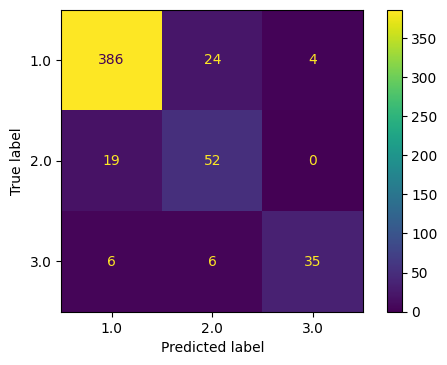

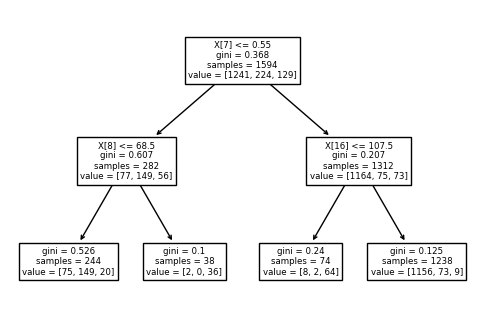

In [60]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100                   # Define o tamanho da imagem para 100
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay # Importação para matriz de confusão
from sklearn.metrics import classification_report  # Importação para o relatório de classificação


y_fetos_pred = clf.predict(X_fetos_test)           # Salva a previsão do teste de classificação

ConfusionMatrixDisplay.from_estimator(clf, X_fetos_test, y_fetos_test)       # Plot da matriz de confusão
print(classification_report(y_fetos_test, y_fetos_pred, zero_division=0))    # Plot do relatório

plt.figure()                    # Plota em formato de figura
plot_tree(clf, filled = False)  # Plota em formato de árvore
plt.show()                      # Plota a árvore gerada

---**Floresta Aleatória**---

Algoritmo que constrói uma infinidade de árvores de decisão. A decisão de cada árvore conta como um "voto", a previsão que tiver mais votos é a previsão utilizada.

**n_estimators** é o número de árvores da floresta e **n_jobs** é o número de threads que será usado em paralelo, -1 usa todos.

In [61]:
from sklearn.ensemble import RandomForestClassifier                                       # Import da floresta aleatória de classificação
clf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=123, n_jobs=-1)  # Salva o classificador em variável com características específicas

clf.fit(X_fetos_train, y_fetos_train)                                                     # Treina o classificador

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=123)

**Acurácia**

Para a acurácia do classificador se retorna a porcentagem do acerto, quanto maior melhor.

In [62]:
acuracia_clf_train = 100 * cross_val_score(clf, X_fetos_train, y_fetos_train).mean()      # Acurácia para o treino de classificação
print("Acuracia do treino:", acuracia_clf_train, "\n")                                    # Mostra a acurácia

acuracia_clf_test = 100 * cross_val_score(clf, X_fetos_test, y_fetos_test).mean()         # Acurácia para o teste de classificação
print("Acuracia do teste: ", acuracia_clf_test, "\n")                                     # Mostra a acurácia

Acuracia do treino: 91.40474359732656 

Acuracia do teste:  91.16381590548403 



**Plotagens**

A random forest retorna uma lista de árvores, localizadas em clf_estimators_[X]

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       414
         2.0       0.77      0.68      0.72        71
         3.0       0.95      0.77      0.85        47

    accuracy                           0.92       532
   macro avg       0.88      0.81      0.84       532
weighted avg       0.91      0.92      0.91       532



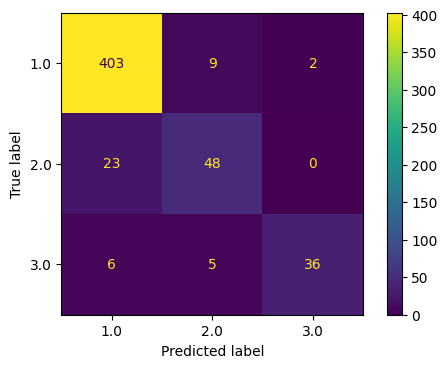

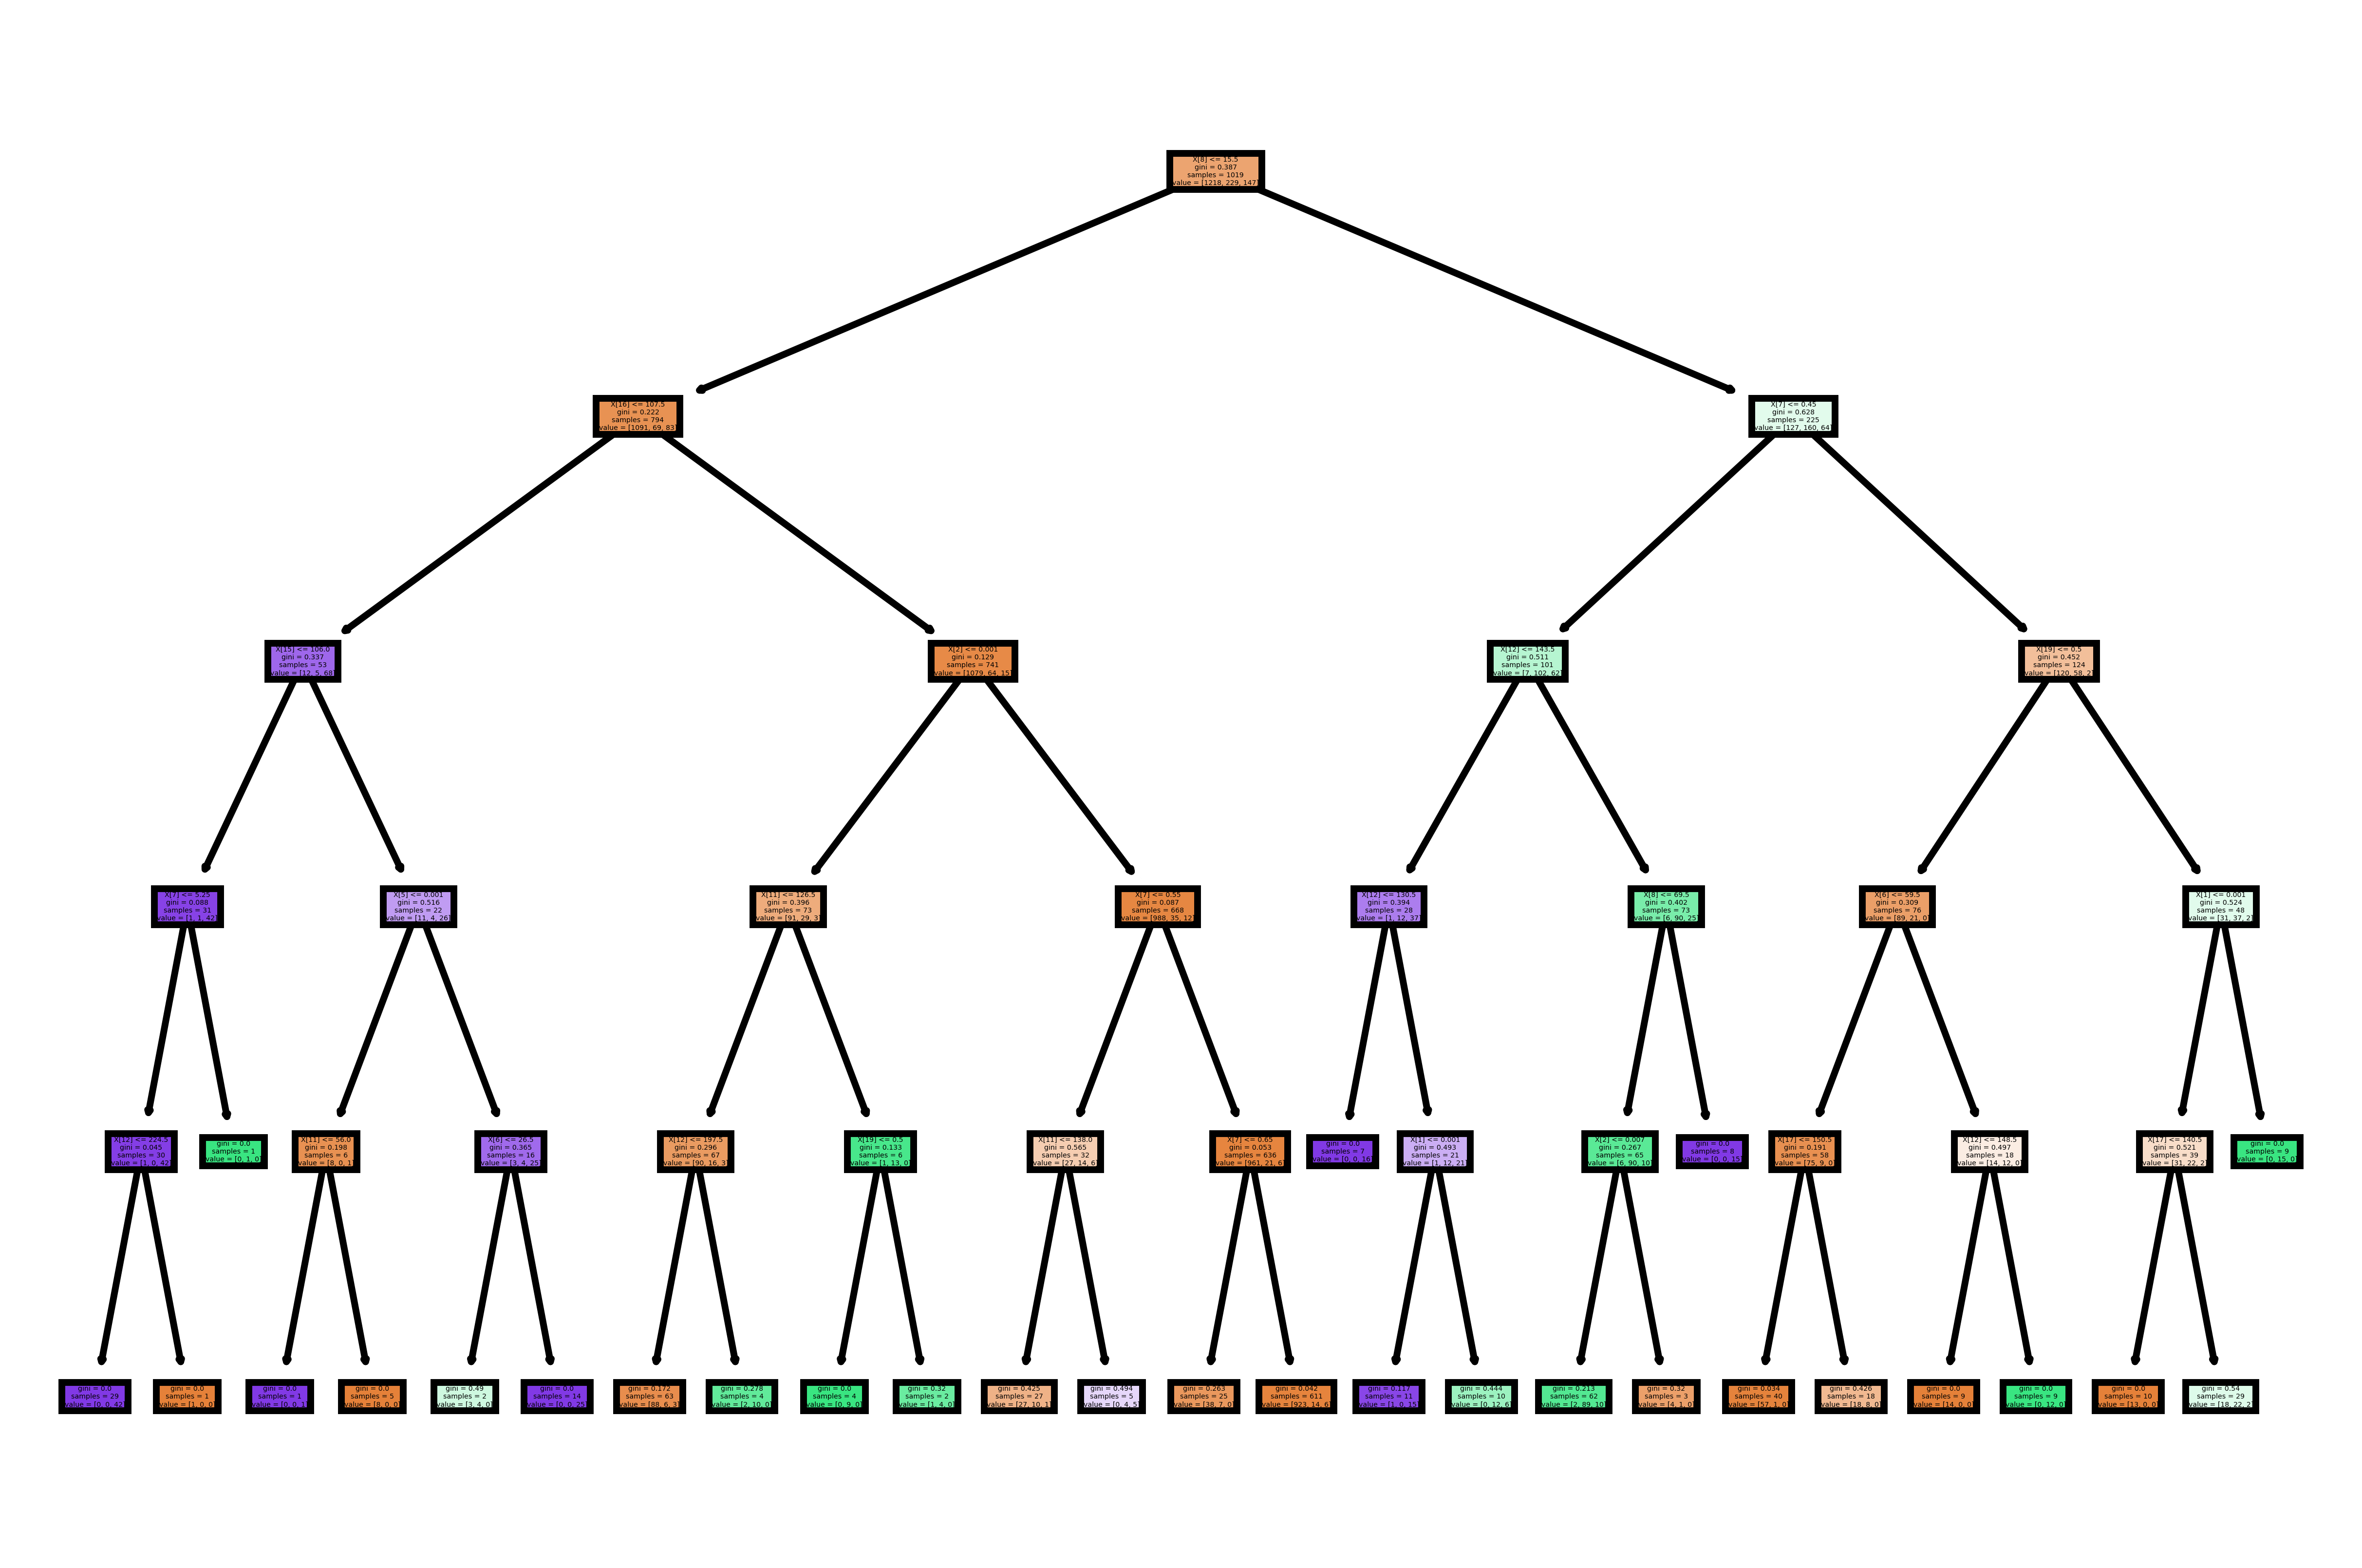

In [63]:
y_fetos_pred = clf.predict(X_fetos_test)                                                  # Salva a previsão do teste de classificação

ConfusionMatrixDisplay.from_estimator(clf, X_fetos_test, y_fetos_test)                    # Plota a matriz de confusão
print(classification_report(y_fetos_test, y_fetos_pred))                                  # Plota o relatório de classificação
mpl.rcParams['figure.dpi'] = 1000                                                         # Aumentando a imagem da floresta para 1000

plt.figure()                                                                              # Plot em figura
plot_tree(clf.estimators_[499], filled = True)                                            # Plot em árvore
plt.show()                                                                                # Plota a floresta gerada


---**XGBoost**---

Utiliza o mesmo conceito de ensamble da floresta aleatória, mas não junta previsões de cada árvore, prevê em cima do erro (resíduo) da previsão anterior

In [64]:
import xgboost as xgb                                                                # Import do XGBoost

clf = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=123, n_jobs=-1)  # Salvando o classificador em variável com características específicas
clf.fit(X_fetos_train, y_fetos_train)                                                # Treinando o classificador

XGBClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
              objective='multi:softprob', random_state=123)

**Acurácia**

Para a acurácia do classificador se retorna a porcentagem do acerto, quanto maior melhor.

In [65]:
acuracia_clf_train = 100 * cross_val_score(clf, X_fetos_train, y_fetos_train).mean() # Calcula acurácia para o treino de classificação
print("Acuracia do treino:", acuracia_clf_train, "\n")                               # Mostra acurácia

acuracia_clf_test = 100 * cross_val_score(clf, X_fetos_test, y_fetos_test).mean()    # Calcula acurácia para o teste de classificação
print("Acuracia do teste: ", acuracia_clf_test, "\n")                                # Mostra acurácia


Acuracia do treino: 94.9180812681138 

Acuracia do teste:  92.86545582789631 



**Plotagens**

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       414
         2.0       0.87      0.73      0.79        71
         3.0       0.91      0.89      0.90        47

    accuracy                           0.94       532
   macro avg       0.91      0.87      0.89       532
weighted avg       0.94      0.94      0.94       532



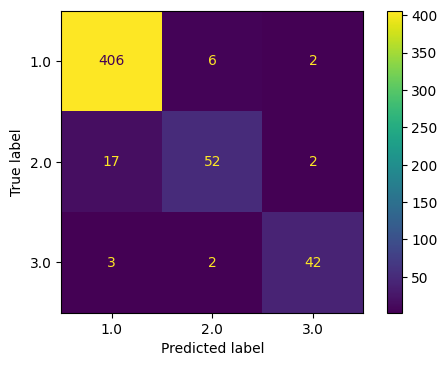

<Figure size 6000x4000 with 0 Axes>

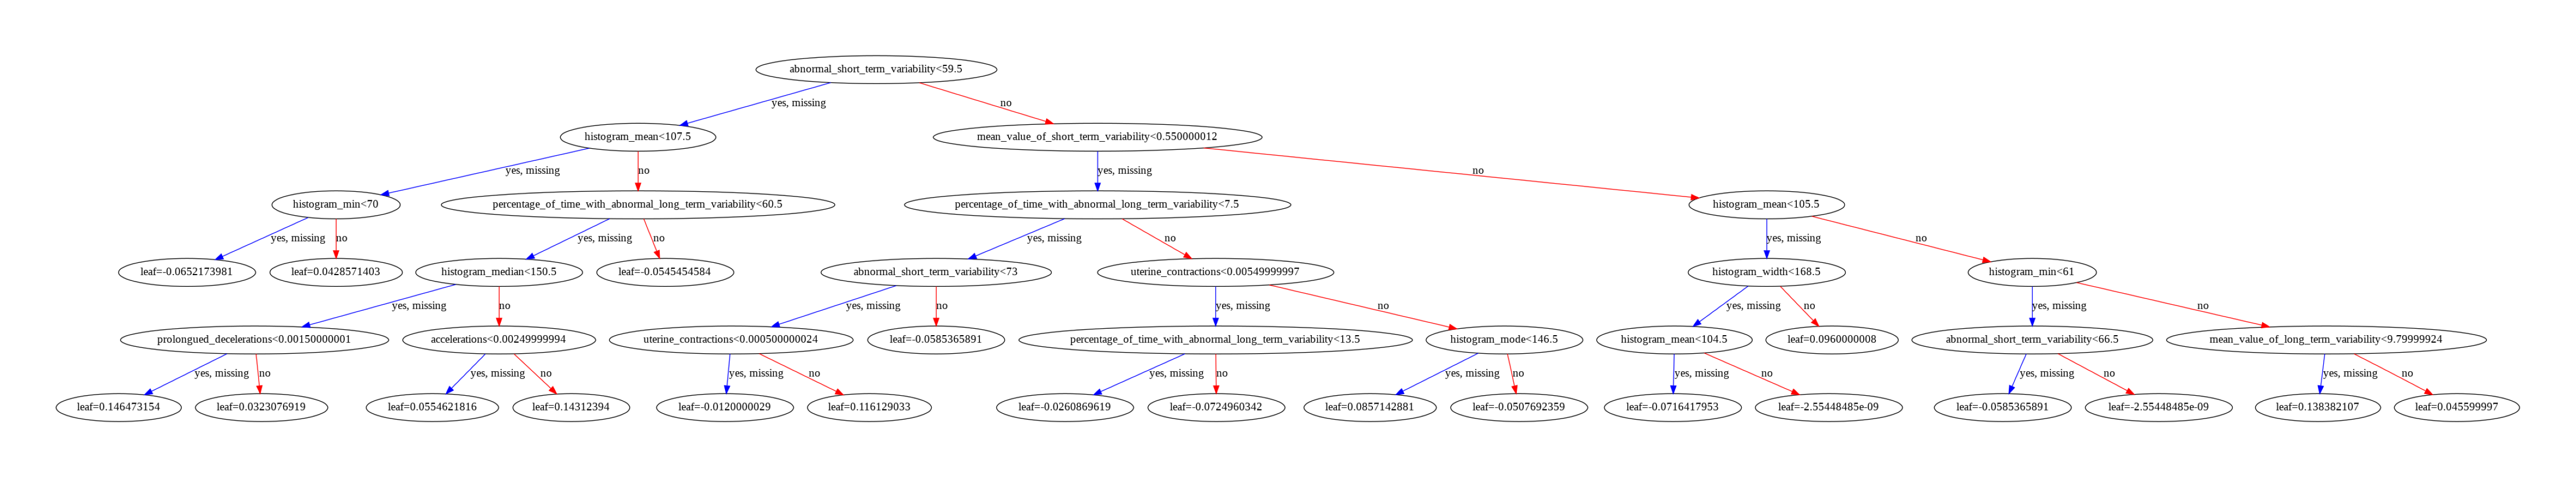

In [66]:
mpl.rcParams['figure.dpi'] = 100                                         # Volta o tamanho da imagem para 100

y_fetos_pred = clf.predict(X_fetos_test)                                 # Salva a predição do teste de classificação

ConfusionMatrixDisplay.from_estimator(clf, X_fetos_test, y_fetos_test)   # Plota a matriz de confusão
print(classification_report(y_fetos_test, y_fetos_pred))                 # Plota o relatório de classificação

mpl.rcParams['figure.dpi'] = 1000                                        # Volta o tamanho da imagem para 1000

plt.figure()                                                             # Plota figura
xgb.plot_tree(clf)                                                       # Plota árvore
plt.show()                                                               # Plota o XGBoost gerado


**K-Nearest Neighbor**

In [77]:
from sklearn.neighbors import KNeighborsClassifier

#Criando instância do K-NN
clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')  # Salvando o classificador do KNN em variável com caractertísticas específicas
clf.fit(X_fetos_train, y_fetos_train) # Treinando o classificador

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

**Acurácia**

In [78]:
acuracia_clf_train = 100 * cross_val_score(clf, X_fetos_train, y_fetos_train).mean() # Calcula acurácia para o treino de classificação
print("Acuracia do treino:", acuracia_clf_train, "\n")                               # Mostra acurácia

acuracia_clf_test = 100 * cross_val_score(clf, X_fetos_test, y_fetos_test).mean()    # Calcula acurácia para o teste de classificação
print("Acuracia do teste: ", acuracia_clf_test, "\n")                                # Mostra acurácia


Acuracia do treino: 88.26876441710534 

Acuracia do teste:  86.84006348086758 

